In [6]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import os

from sklearn.model_selection import train_test_split
import pickle

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import sklearn.metrics as metrics

from sklearn.model_selection import KFold

warnings.filterwarnings('ignore')


#Saving a array of models
def save_item(model,filename):
    pickle.dump(model, open(filename, 'wb'))



In [7]:
data = pd.read_csv('crop_dataset_no_rainfall-filter_cropLabel.csv')

data

,N,P,K,temperature,humidity,ph,label
0,90,42,43,20.879744,82.002744,6.502985,rice
1,85,58,41,21.770462,80.319644,7.038096,rice
2,60,55,44,23.004459,82.320763,7.840207,rice
3,74,35,40,26.491096,80.158363,6.980401,rice
4,78,42,42,20.130175,81.604873,7.628473,rice
...,...,...,...,...,...,...,...
1995,107,34,32,26.774637,66.413269,6.780064,coffee
1996,99,15,27,27.417112,56.636362,6.086922,coffee
1997,118,33,30,24.131797,67.225123,6.362608,coffee
1998,117,32,34,26.272418,52.127394,6.758793,coffee


In [8]:
#Data Exploration:

print("Number of Instances and Attributes:", data.shape)
print('\n')

print('Dataset columns:',data.columns)
print('\n')

print('Data types of each columns: ', data.info())

Number of Instances and Attributes: (2000, 7)


Dataset columns: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'label'], dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2000 non-null   int64  
 1   P            2000 non-null   int64  
 2   K            2000 non-null   int64  
 3   temperature  2000 non-null   float64
 4   humidity     2000 non-null   float64
 5   ph           2000 non-null   float64
 6   label        2000 non-null   object 
dtypes: float64(3), int64(3), object(1)
memory usage: 109.5+ KB
Data types of each columns:  None


In [9]:
#Target label values

print("Different crops are:\n")
for i in data['label'].unique():
    print("   "+i)

print("\n\nTotal no of different crops are:" , len((data['label'].unique())))

Different crops are:

   rice
   maize
   chickpea
   kidneybeans
   pigeonpeas
   mothbeans
   mungbean
   blackgram
   lentil
   pomegranate
   banana
   mango
   grapes
   watermelon
   apple
   orange
   papaya
   cotton
   jute
   coffee


Total no of different crops are: 20


In [10]:
#Checking Duplicates:

count_dups = data.duplicated().sum()
print("Number of Duplicates: ", count_dups)
if count_dups >= 1:
    data.drop_duplicates(inplace=True)
    print('Duplicate values removed!')
else:
        print('No Duplicate values')

Number of Duplicates:  0
No Duplicate values


In [11]:
#Checking NULL values

data.isnull().sum() #No null values

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
label          0
dtype: int64

<Axes: >

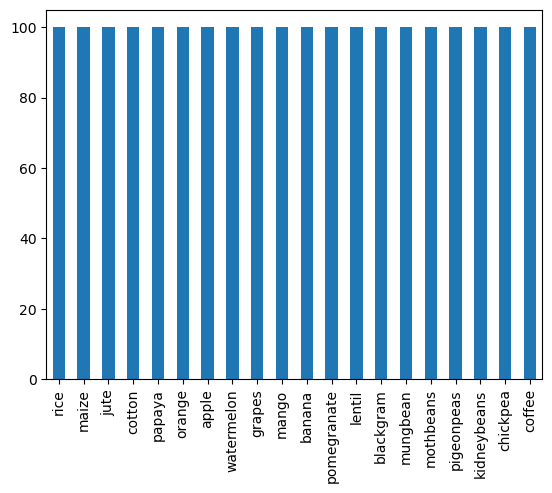

In [12]:
#Crop vs count ( no of instances )

data['label'].value_counts().plot(kind='bar')

<Axes: >

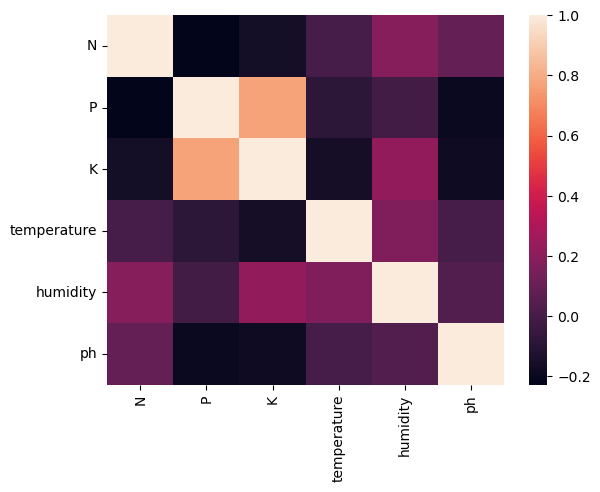

In [13]:
#Correlation Matrix 

sns.heatmap(data.corr())

In [14]:
#Data Splitting

target = 'label'

X = data.drop(target, axis=1)
Y = data[target]

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.3)

In [15]:
#Normalization using standard scaler

normalization = StandardScaler()
normalization.fit(X)

save_item(normalization , 'normalization.pkl')


In [16]:
# Creating 5 random subsets using K-FOLD

kf = KFold(n_splits = 5 , shuffle=True)

array = []
for index in kf.split(data):
  array.append(index[1])

set1 = array[0]
set2 = array[1]
set3 = array[2]
set4 = array[3]
set5 = array[4]

df1 = data.iloc[set1]
df2 = data.iloc[set2]
df3 = data.iloc[set3]
df4 = data.iloc[set4]
df5 = data.iloc[set5]

In [17]:
Models = {}

Models['Naive Bayes'] =[ GaussianNB() , df1]

Models['SVM'] = [SVC() , df2]

Models['KNN'] = [ KNeighborsClassifier() , df3]

Models['Decision Tree'] = [ DecisionTreeClassifier() , df4]

Models['Random Forest'] = [ RandomForestClassifier() , df5]

In [18]:
for model in Models:
    data = Models[model][1]
    
    X = data.iloc[:,:-1]
    Y = data.iloc[:,-1]
    
    X = normalization.transform(X)
    
    Models[model][0].fit(X , Y)

In [19]:
#Testing

X_test = normalization.transform(X_test)

accuracy_array = []
confusion_matrix_array = []

print("\nAccuracy of the models are:\n")

for i in Models:
    
    testing = Models[i][0].predict(X_test)
    
    v = accuracy_score(testing , Y_test) * 100
    
    confusion_matrix_array.append(confusion_matrix(testing , Y_test))
    
    accuracy_array.append(v)
    
    print(i ,":",v)
    


Accuracy of the models are:

Naive Bayes : 94.66666666666667
SVM : 86.16666666666667
KNN : 87.33333333333333
Decision Tree : 92.33333333333333
Random Forest : 95.0


<Axes: >

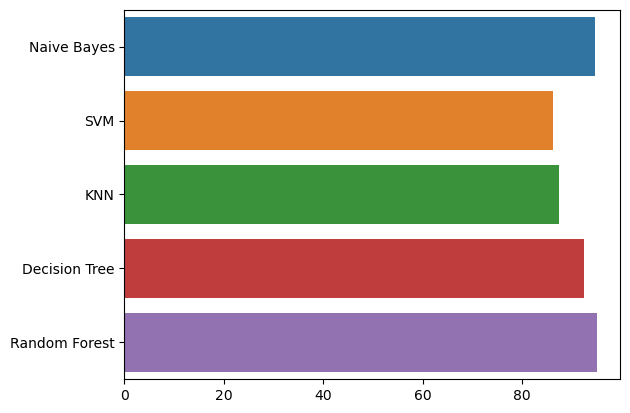

In [20]:
#Comparision of accuracy's

model_names = list(Models.keys())
sns.barplot(y = model_names , x = accuracy_array)

In [21]:
#Saving a array of models

array = list(Models.values())
save_item(array, 'model.pkl')

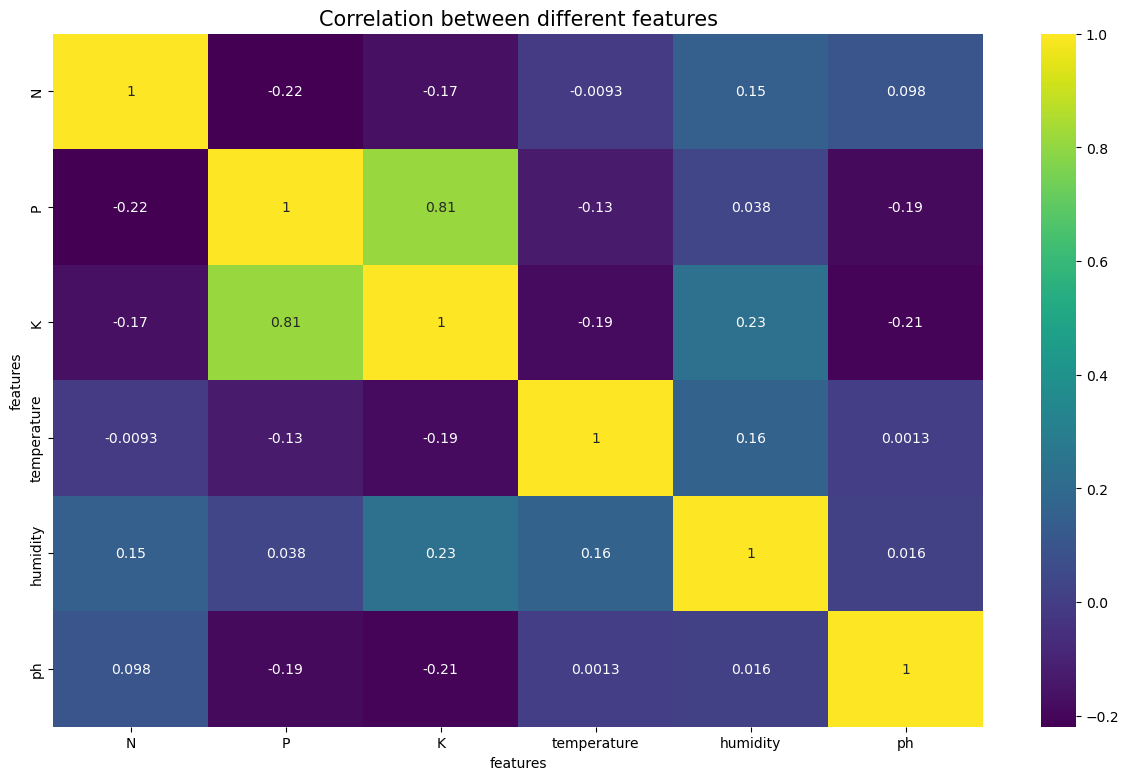

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(data.corr(), annot=True,cmap='viridis')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

In [23]:
from __future__ import print_function
import pandas as pd # data analysis
import numpy as np # linear algebra

#import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots


from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score

##
features = data[['N', 'P','K','temperature', 'humidity', 'ph']]
target = data['label']

acc = []
model = []

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

#Confusion matrix for knn
y_pred = knn.predict(X_test)
y_true = Y_test

from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_knn, annot=True, linewidth=0.5, fmt=".0f",cmap='viridis', ax = ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Predicted vs actual')
plt.show()

#k parameter affecting accuracy
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,Y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(Y_test, yhat)

mean_acc

NameError: name 'knn' is not defined

In [24]:
loc = np.arange(1,21,step=1.0)
#loc = np.arange(1, 11, step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

NameError: name 'mean_acc' is not defined

<Figure size 1000x600 with 0 Axes>

Naive Bayes:
Accuracy: 0.9666666666666667
Precision: 0.9752525252525251
Recall: 0.9666666666666667
F1 Score: 0.9633333333333333

SVM:
Accuracy: 0.8416666666666667
Precision: 0.8638338744588746
Recall: 0.8416666666666667
F1 Score: 0.8339593544856704

KNN:
Accuracy: 0.775
Precision: 0.7751758658008658
Recall: 0.775
F1 Score: 0.7518424440483265

Decision Tree:
Accuracy: 0.875
Precision: 0.8830952380952382
Recall: 0.875
F1 Score: 0.8663725490196079

Random Forest:
Accuracy: 0.9166666666666666
Precision: 0.9214309764309764
Recall: 0.9166666666666666
F1 Score: 0.9119675925925925


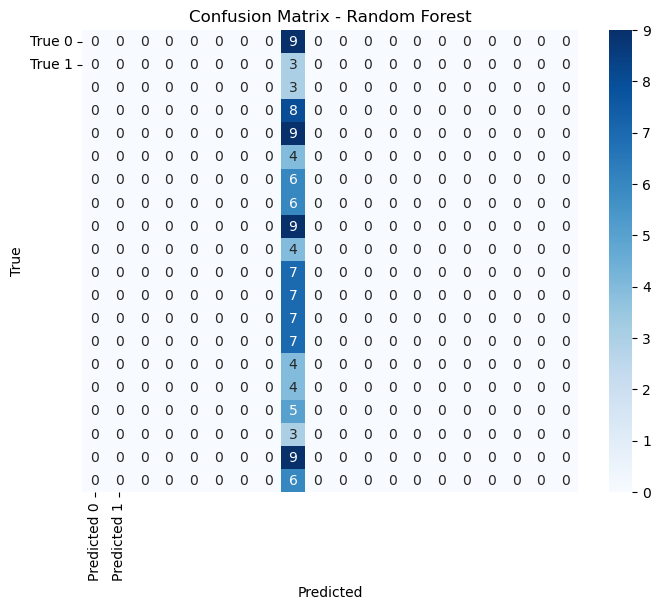

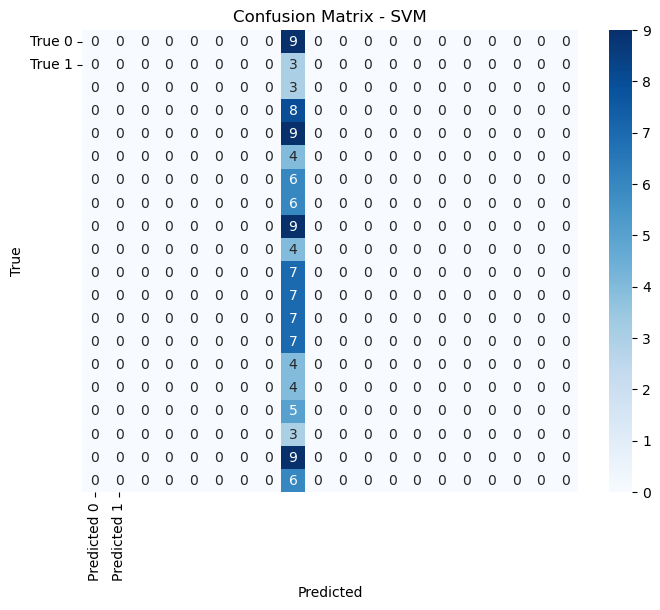

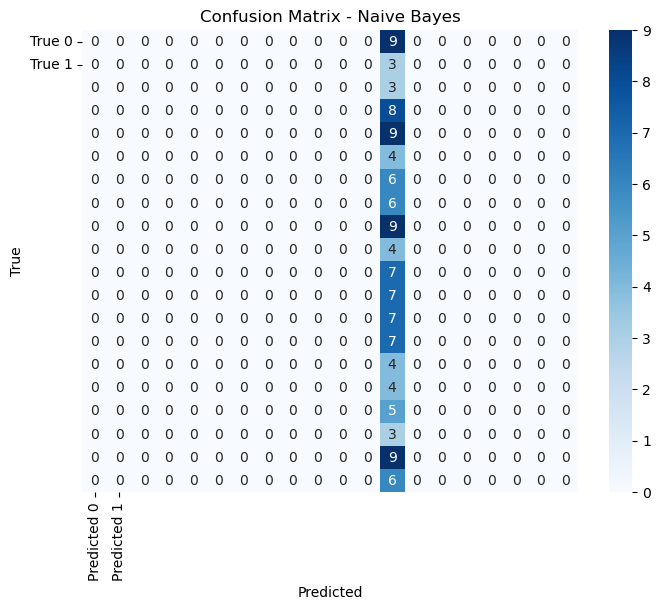

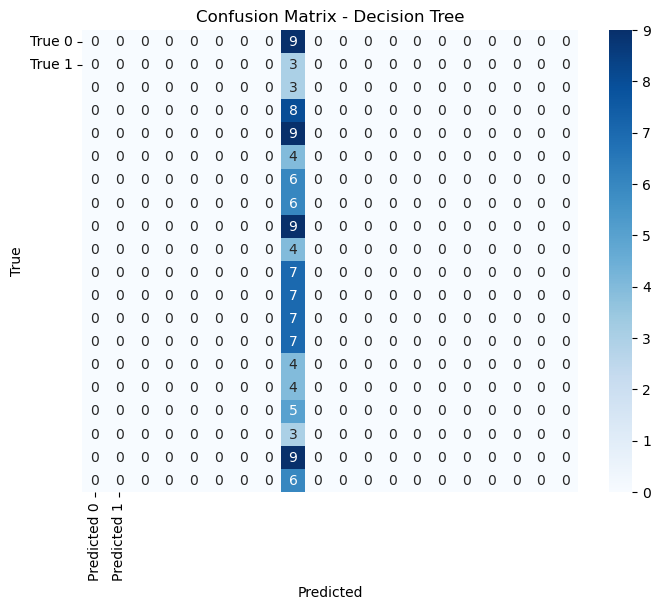

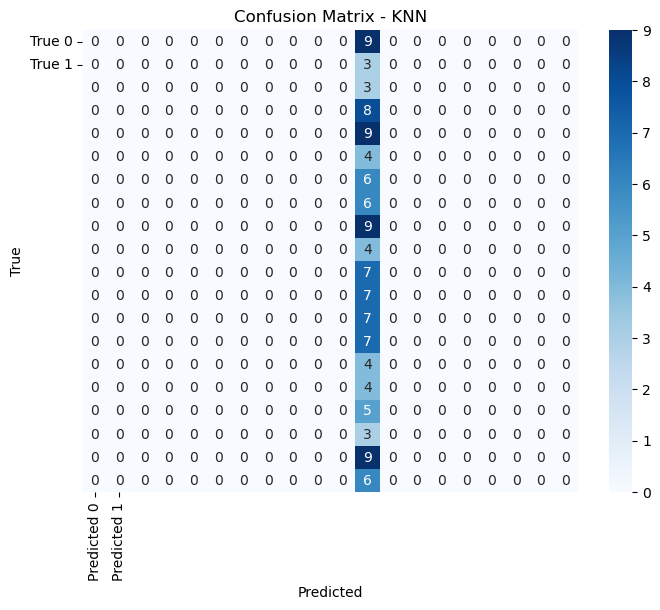

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assume you have your data (X) and target (y) ready

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
naive_bayes = GaussianNB()
svm = SVC()
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()

# Train models
naive_bayes.fit(X_train, Y_train)
svm.fit(X_train, Y_train)
knn.fit(X_train, Y_train)
decision_tree.fit(X_train, Y_train)
random_forest.fit(X_train, Y_train)

# Predictions
nb_predictions = naive_bayes.predict(X_test)
svm_predictions = svm.predict(X_test)
knn_predictions = knn.predict(X_test)
dt_predictions = decision_tree.predict(X_test)
rf_predictions = random_forest.predict(X_test)


# Calculate metrics
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

nb_accuracy, nb_precision, nb_recall, nb_f1 = calculate_metrics(Y_test, nb_predictions)
svm_accuracy, svm_precision, svm_recall, svm_f1 = calculate_metrics(Y_test, svm_predictions)
knn_accuracy, knn_precision, knn_recall, knn_f1 = calculate_metrics(Y_test, knn_predictions)
dt_accuracy, dt_precision, dt_recall, dt_f1 = calculate_metrics(Y_test, dt_predictions)
rf_accuracy, rf_precision, rf_recall, rf_f1 = calculate_metrics(Y_test, rf_predictions)

# Print metrics
print("Naive Bayes:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1)
print()

print("SVM:")
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print()

print("KNN:")
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)
print()

print("Decision Tree:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)
print()

print("Random Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)


# Assuming you have X_train, X_test, Y_train, Y_test, normalization, and Models
algorithms = ['Random Forest', 'SVM', 'Naive Bayes', 'Decision Tree', 'KNN']

for algorithm in algorithms:
    model_object = Models[algorithm][0]
    data = Models[algorithm][1]
    X = data.iloc[:, :-1]
    Y = data.iloc[:, -1]
    
    X_test = normalization.transform(X_test)
    
    model_object.fit(X, Y)
    
    y_pred = model_object.predict(X_test)
    
    # Calculate and plot confusion matrix
    cm = confusion_matrix(Y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Predicted 0", "Predicted 1"],
                yticklabels=["True 0", "True 1"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"Confusion Matrix - {algorithm}")
    plt.show()
